In [130]:
import os
import csv
import pandas as pd
import numpy as np
from rkn_parser import fetch_data

DATA_DIR = '../covid19/data/daily'

In [58]:
fetch_data()

In [59]:
!ls -l '../covid19/data/daily'

total 264
-rw-r--r--  1 lebster  staff    77 Apr 19 14:51 2020-03-19.csv
-rw-r--r--  1 lebster  staff   509 Apr 19 14:51 2020-03-20.csv
-rw-r--r--  1 lebster  staff    19 Apr 19 14:51 2020-03-21.csv
-rw-r--r--  1 lebster  staff   393 Apr 19 14:51 2020-03-22.csv
-rw-r--r--  1 lebster  staff   159 Apr 19 14:51 2020-03-23.csv
-rw-r--r--  1 lebster  staff   770 Apr 19 14:51 2020-03-24.csv
-rw-r--r--  1 lebster  staff  1141 Apr 19 14:51 2020-03-25.csv
-rw-r--r--  1 lebster  staff  1061 Apr 19 14:51 2020-03-26.csv
-rw-r--r--  1 lebster  staff   845 Apr 19 14:51 2020-03-27.csv
-rw-r--r--  1 lebster  staff  1314 Apr 19 14:51 2020-03-28.csv
-rw-r--r--  1 lebster  staff  1303 Apr 19 14:51 2020-03-29.csv
-rw-r--r--  1 lebster  staff  1771 Apr 19 14:51 2020-03-30.csv
-rw-r--r--  1 lebster  staff  1207 Apr 19 14:51 2020-03-31.csv
-rw-r--r--  1 lebster  staff  1781 Apr 19 14:51 2020-04-01.csv
-rw-r--r--  1 lebster  staff  1464 Apr 19 14:51 2020-04-02.csv
-rw-r--r--  1 lebster  staff  1569 Apr 19 14:

In [60]:
covid_cases = {}  # Store daily cases grouped by date.
columns = []  # Store dates to use as columns for result data frame.
files = os.listdir(DATA_DIR)
for file in files:
    if file.find('.csv') == -1:
        continue

    date = np.datetime64(file.replace('.csv', ''))
    columns.append(date)
    daily_cases_df = pd.read_csv(os.path.join(daily_dir, file), index_col=['region'])['cases']

    # Fix synonyms in index.
    daily_cases_df.rename(index={'Республика Горный Алтай': 'Республика Алтай'}, inplace=True)

    daily_cases = daily_cases_df.to_dict()
    covid_cases.setdefault(date, daily_cases)

# Create data frame from the daily cases.
covid_cases_df = pd.DataFrame(covid_cases, columns=np.sort(columns)).fillna(0)

# Post cleanup: remove wrong indexes.
wrong_indexes = [
    'Российской Федерации в',
    'Под медицинским наблюдением с января',
    'За последние сутки зарегистрирован',
    'За весь период выписано',
    'За сутки выписаны по выздоровлению'
]
covid_cases_df.drop(index=wrong_indexes, inplace=True, errors='ignore')

display(covid_cases_df)

,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,...,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
Москва,0.0,33.0,0.0,54.0,0.0,28.0,120.0,1.0,157.0,114.0,...,1124.0,1030.0,1306.0,1355.0,1489.0,1774.0,1370.0,1959.0,2649.0,3570.0
Республика Саха (Якутия),0.0,6.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,3.0,3.0,3.0,1.0,7.0,2.0,3.0,9.0,41.0
Санкт-Петербург,0.0,4.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,11.0,...,35.0,80.0,69.0,121.0,121.0,130.0,154.0,424.0,139.0,114.0
Самарская область,0.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,...,2.0,1.0,0.0,5.0,11.0,0.0,10.0,13.0,1.0,15.0
Кировская область,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,6.0,0.0,15.0,0.0,13.0,9.0,18.0,20.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Забайкальский край,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,14.0,2.0,3.0,1.0
Республика Тыва,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,4.0
Ненецкий автономный округ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Чукотский АО,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [61]:
# Export data frame to CSV file.
# covid_cases_df.to_csv(os.path.join('../covid19/data', 'covid-cases.csv'))

In [86]:
# covid_cases_df['2020-04-19'].sum()

In [85]:
# covid_cases_df.sum()
# covid_cases_df.sum().sort_values(ascending=False)

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
covid_cases_daily_df = covid_cases_df.sum().reset_index()
# covid_cases_daily_df

In [90]:
covid_cases_daily_df.columns = ['date','cases']
# covid_cases_daily_df

[Text(0, 0, '19 Марта'),
 Text(0, 0, '20 Марта'),
 Text(0, 0, '21 Марта'),
 Text(0, 0, '22 Марта'),
 Text(0, 0, '23 Марта'),
 Text(0, 0, '24 Марта'),
 Text(0, 0, '25 Марта'),
 Text(0, 0, '26 Марта'),
 Text(0, 0, '27 Марта'),
 Text(0, 0, '28 Марта'),
 Text(0, 0, '29 Марта'),
 Text(0, 0, '30 Марта'),
 Text(0, 0, '31 Марта'),
 Text(0, 0, '01 Апреля'),
 Text(0, 0, '02 Апреля'),
 Text(0, 0, '03 Апреля'),
 Text(0, 0, '04 Апреля'),
 Text(0, 0, '05 Апреля'),
 Text(0, 0, '06 Апреля'),
 Text(0, 0, '07 Апреля'),
 Text(0, 0, '08 Апреля'),
 Text(0, 0, '09 Апреля'),
 Text(0, 0, '10 Апреля'),
 Text(0, 0, '11 Апреля'),
 Text(0, 0, '12 Апреля'),
 Text(0, 0, '13 Апреля'),
 Text(0, 0, '14 Апреля'),
 Text(0, 0, '15 Апреля'),
 Text(0, 0, '16 Апреля'),
 Text(0, 0, '17 Апреля'),
 Text(0, 0, '18 Апреля'),
 Text(0, 0, '19 Апреля')]

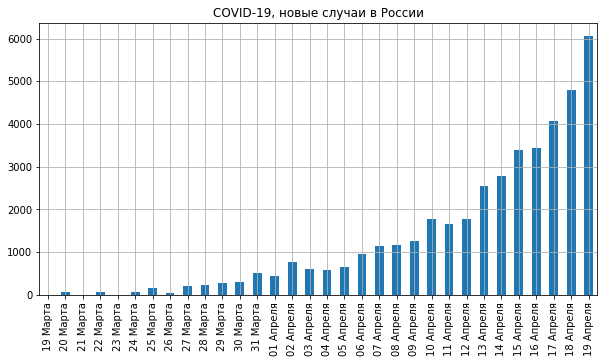

In [157]:
from datetime import datetime

def format_date(date):
    """Transform date from datetime to readable."""
    month_list = ['Января', 'Февраля', 'Марта', 'Апреля', 'Мая', 'Июня', 'Июля', 'Августа', 'Сентября', 'Октября', 'Ноября', 'Декабря']
    day = date.strftime("%d")
    month = month_list[int(date.strftime("%m")) - 1]
    return f'{day} {month}'

# Fomat date.
covid_cases_daily_df['date_fmt'] = covid_cases_daily_df['date'].apply(format_date)

bar = covid_cases_daily_df['cases'].plot(
    kind='bar', 
    grid=True, 
    title='COVID-19, новые случаи в России',
    width=0.5,
    figsize=(10,5)
)
bar.set_xticklabels(covid_cases_daily_df['date_fmt'])